# SVM Assignment

### Problem Statement
A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

 

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

 

### Objective
You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

In [1]:
#  import all the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# hide warnings
import warnings
warnings.filterwarnings('ignore')


## Import and inspect data frame

In [2]:
# reading the dataset from .csv file
numbers_df = pd.read_csv("train.csv")

In [3]:
# shape of dataframe (columns,rows)
numbers_df.shape

(42000, 785)

In [4]:
# head of data set
numbers_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# check distribution of data 
numbers_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
# summary of the dataset
print(numbers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


## Data preparation and EDA

In [7]:
# Let' check column names of dataframe 
print(numbers_df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [8]:
# Let's check all the numbers present in data frame 
order = list(np.sort(numbers_df['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
# let's check number of na values in column which has na values
# As we don't want to do anything on columns having 0 na values 
numbers_df.loc[:, numbers_df.isnull().any()].isnull().sum()

Series([], dtype: float64)

In [10]:
# Let's drop duplicate columns if any present in data set 
numbers_df = numbers_df.drop_duplicates()
numbers_df.shape

(42000, 785)

In [11]:
# Let's check if there is any negative value in dataframe
np.sum((numbers_df < 0).values.ravel())

0

In [12]:
# Let's check number of unique entries in each column
numbers_df.nunique()

label        10
pixel0        1
pixel1        1
pixel2        1
pixel3        1
pixel4        1
pixel5        1
pixel6        1
pixel7        1
pixel8        1
pixel9        1
pixel10       1
pixel11       1
pixel12       3
pixel13       3
pixel14       2
pixel15       2
pixel16       1
pixel17       1
pixel18       1
pixel19       1
pixel20       1
pixel21       1
pixel22       1
pixel23       1
pixel24       1
pixel25       1
pixel26       1
pixel27       1
pixel28       1
           ... 
pixel754      1
pixel755      1
pixel756      1
pixel757      1
pixel758      1
pixel759      1
pixel760      1
pixel761      3
pixel762     15
pixel763     24
pixel764     38
pixel765     42
pixel766     75
pixel767     91
pixel768     99
pixel769    114
pixel770    126
pixel771    121
pixel772    106
pixel773     81
pixel774     57
pixel775     36
pixel776     19
pixel777     10
pixel778      6
pixel779      3
pixel780      1
pixel781      1
pixel782      1
pixel783      1
Length: 785, dtype: int6

In [13]:
# Let's see minimum values of pixel for each number
numbers_min = numbers_df.groupby('label').min()
numbers_min

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Let's see maximum values of pixel for each number
numbers_max = numbers_df.groupby('label').max()
numbers_max

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,253,177,254,62,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Let's see mean values of pixel for each number
numbers_mean = numbers_df.groupby('label').mean()
numbers_mean

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


## Visualising Data

In [16]:
# Let's take column list and drop column 'label' to do sum calculations
col_list= list(numbers_df)
col_list.remove('label')
col_list

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 '

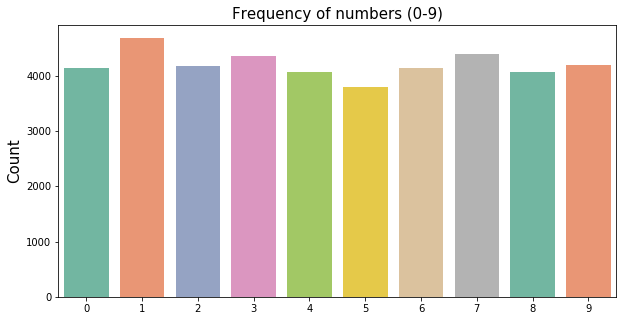

In [17]:
# count plot to see data distribution for different numbers
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="label", data=numbers_df,palette="Set2")
ax.set_title('Frequency of numbers (0-9)',fontsize=15)
ax.set_ylabel("Count", fontsize=15);
ax.set_xlabel("", fontsize=15);
plt.show()

In [18]:
# create sum_pixel(sum of pixels) column to create plot
numbers_df['sum_pixel'] = numbers_df[col_list].sum(axis=1)
numbers_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,sum_pixel
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16649
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44609
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13425
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15025
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51093


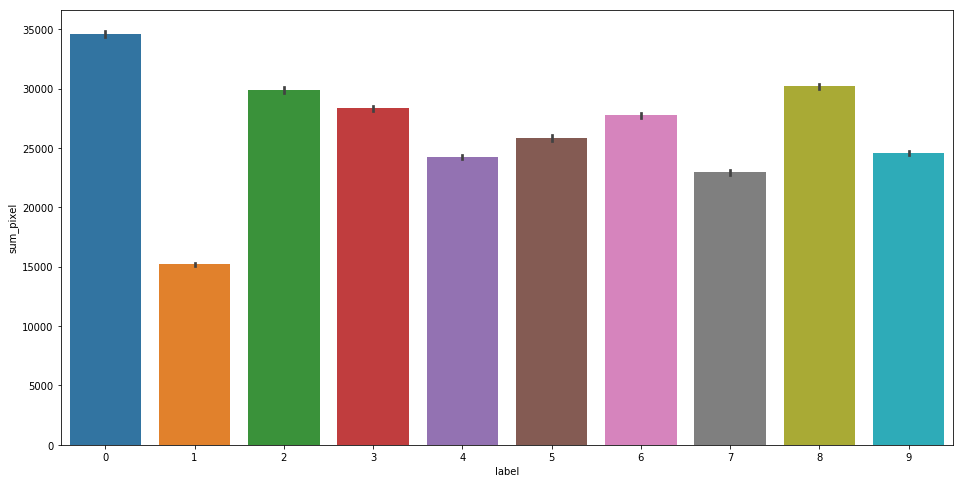

In [19]:
plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='sum_pixel', 
            data=numbers_df, 
            order=order)

In [20]:
# create mean_pixel(mean of pixels) column to create plot
numbers_df['mean_pixel'] = numbers_df[col_list].mean(axis=1)
numbers_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,sum_pixel,mean_pixel
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16649,21.235969
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,44609,56.899235
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13425,17.123724
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15025,19.164541
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,51093,65.169643


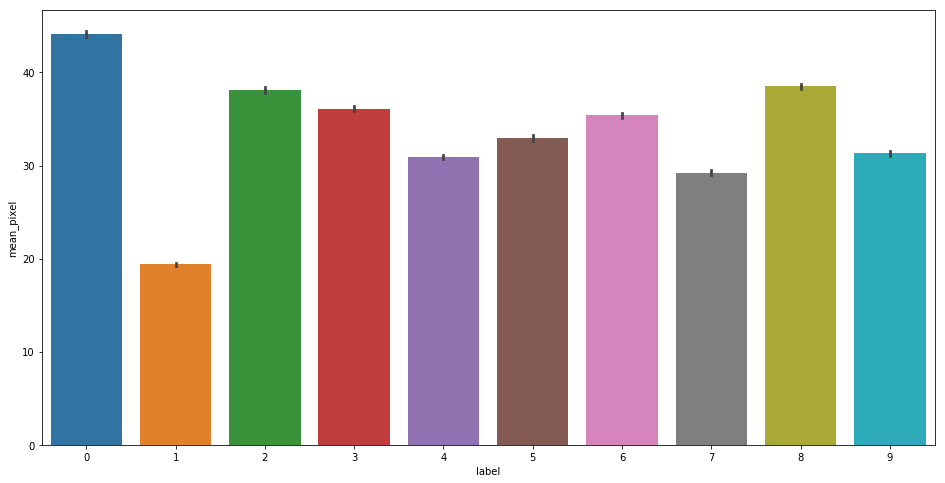

In [21]:
plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='mean_pixel', 
            data=numbers_df, 
            order=order)

In [22]:
# drop 'sum_pixel' and 'mean_pixel' column, as it is not required for further analysis
numbers_df = numbers_df.drop(['sum_pixel','mean_pixel'], axis = 1)
numbers_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's do line plot for all the numbers (0-9) to see distrbution of pixels for different number

We will use numbers_means (seen above) dataframe for these plots which has mean values of pixel for each number.

Text(0.5, 1.0, 'Line plot for number 0')

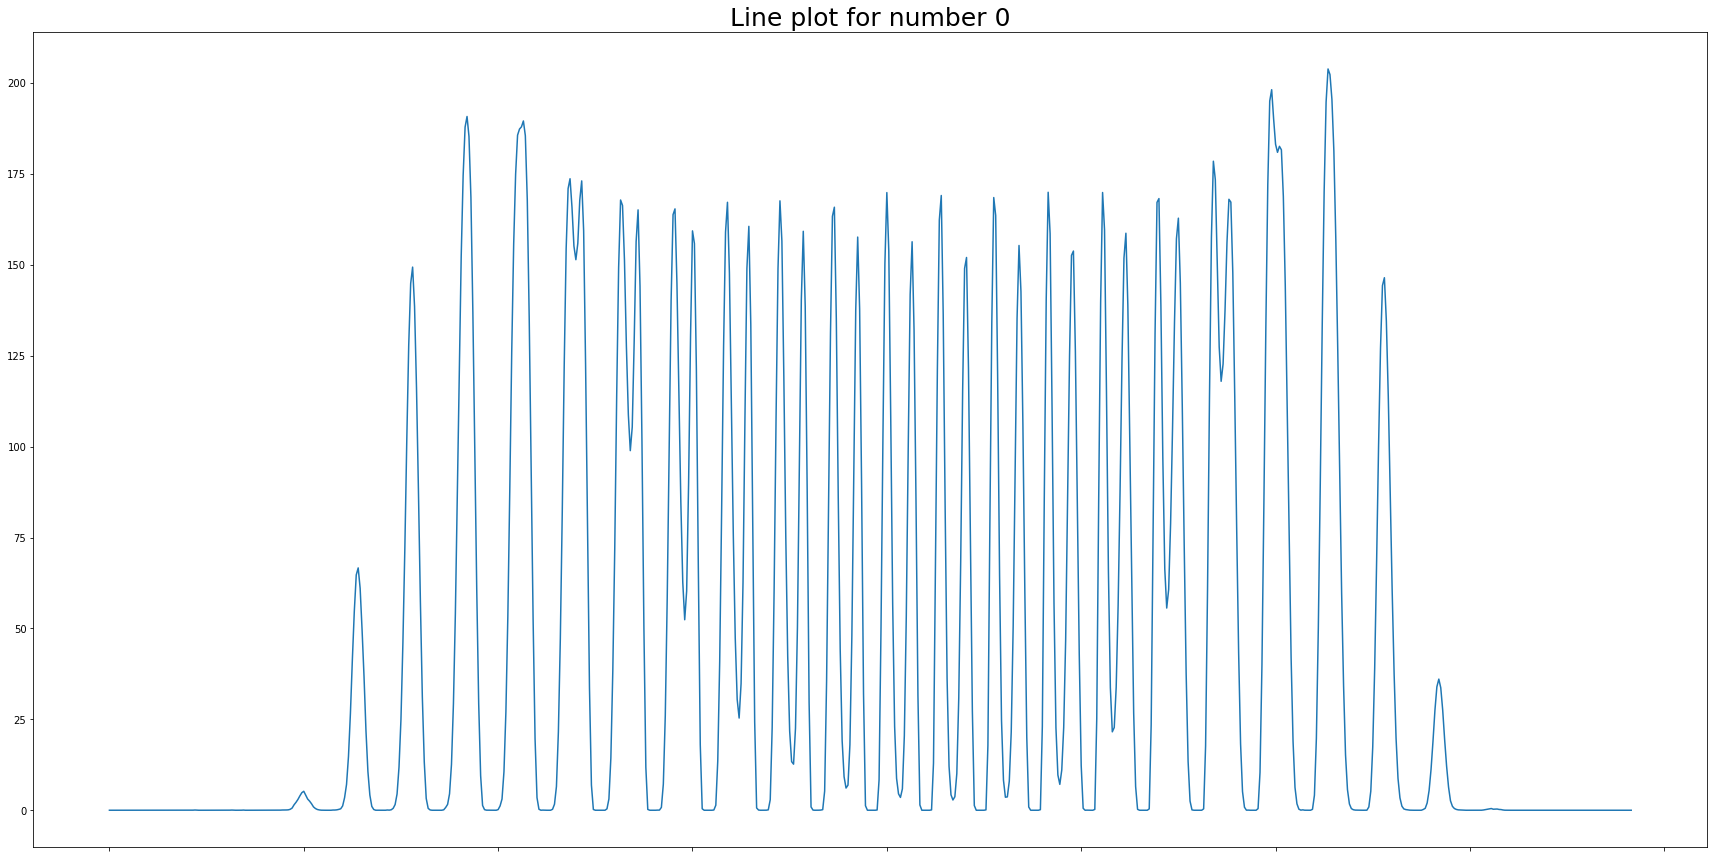

In [24]:
# Line plot for number 0
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[0,:].plot(kind='line')
ax.set_title('Line plot for number 0',fontsize=25)

Text(0.5, 1.0, 'Line plot for number 1')

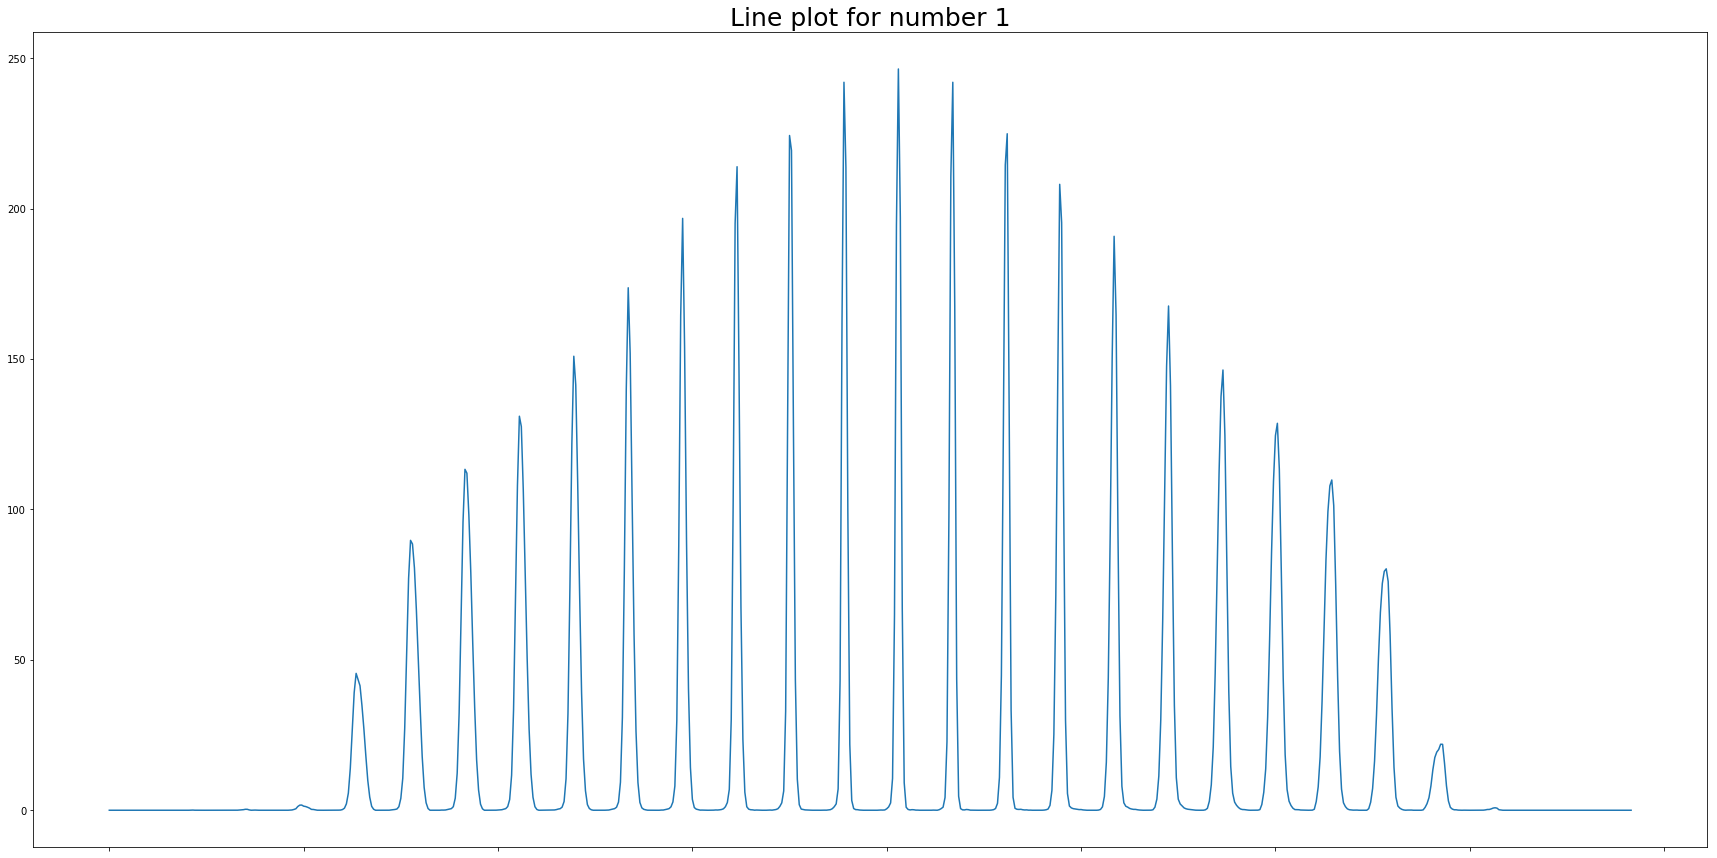

In [25]:
# Line plot for number 1
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[1,:].plot(kind='line')
ax.set_title('Line plot for number 1',fontsize=25)

Text(0.5, 1.0, 'Line plot for number 2')

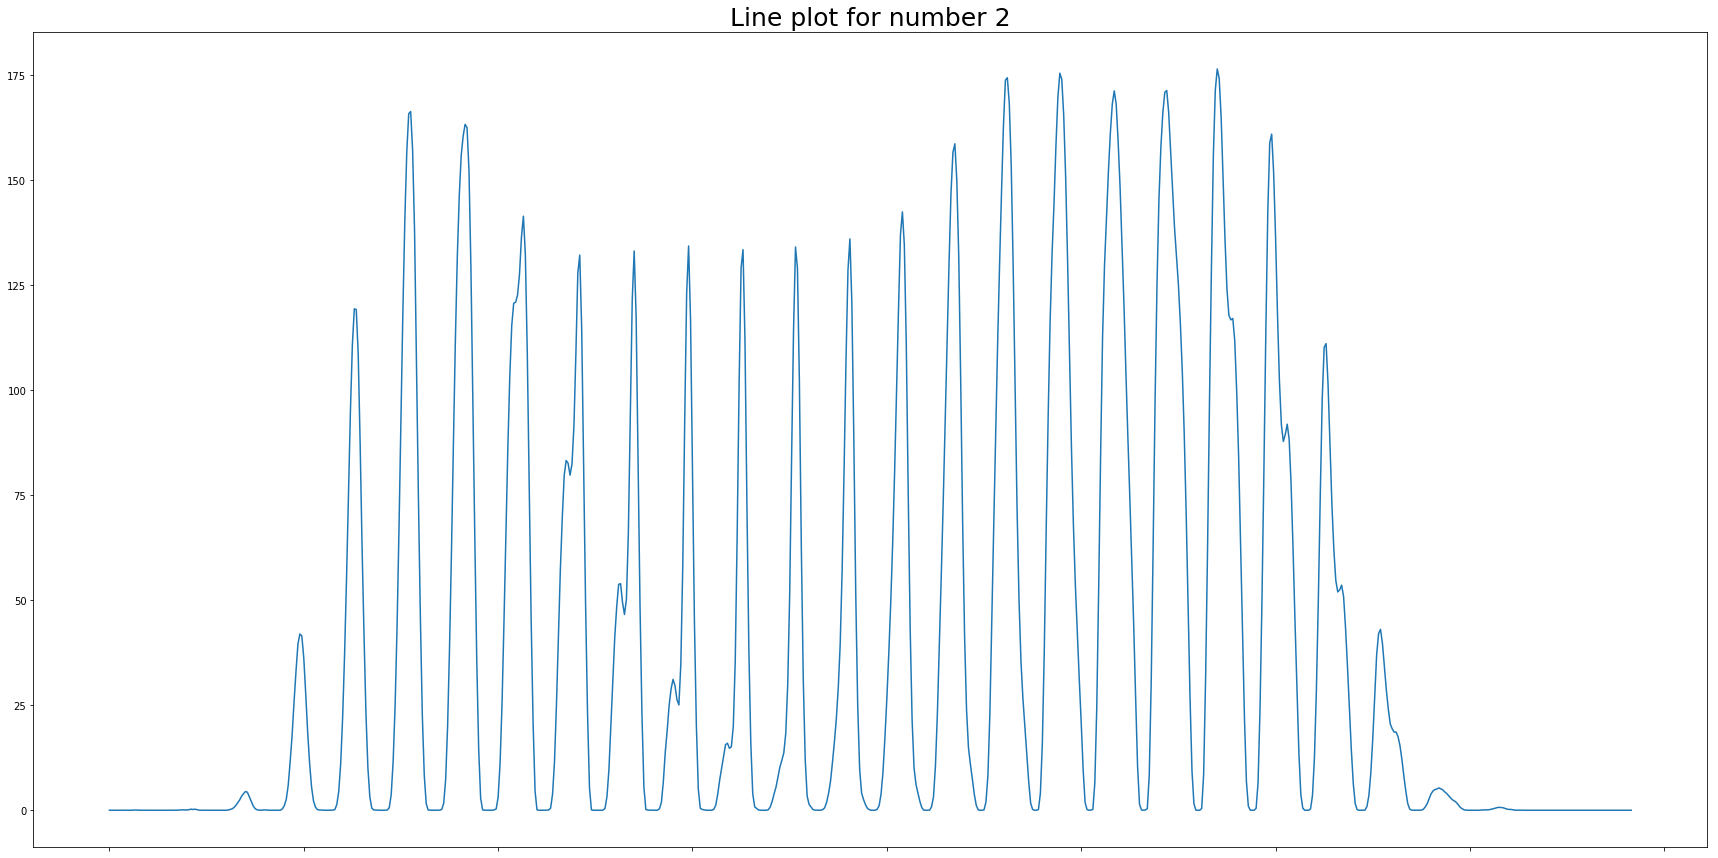

In [26]:
# Line plot for number 2
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[2,:].plot(kind='line')
ax.set_title('Line plot for number 2',fontsize=25)

Text(0.5, 1.0, 'Line plot for number 3')

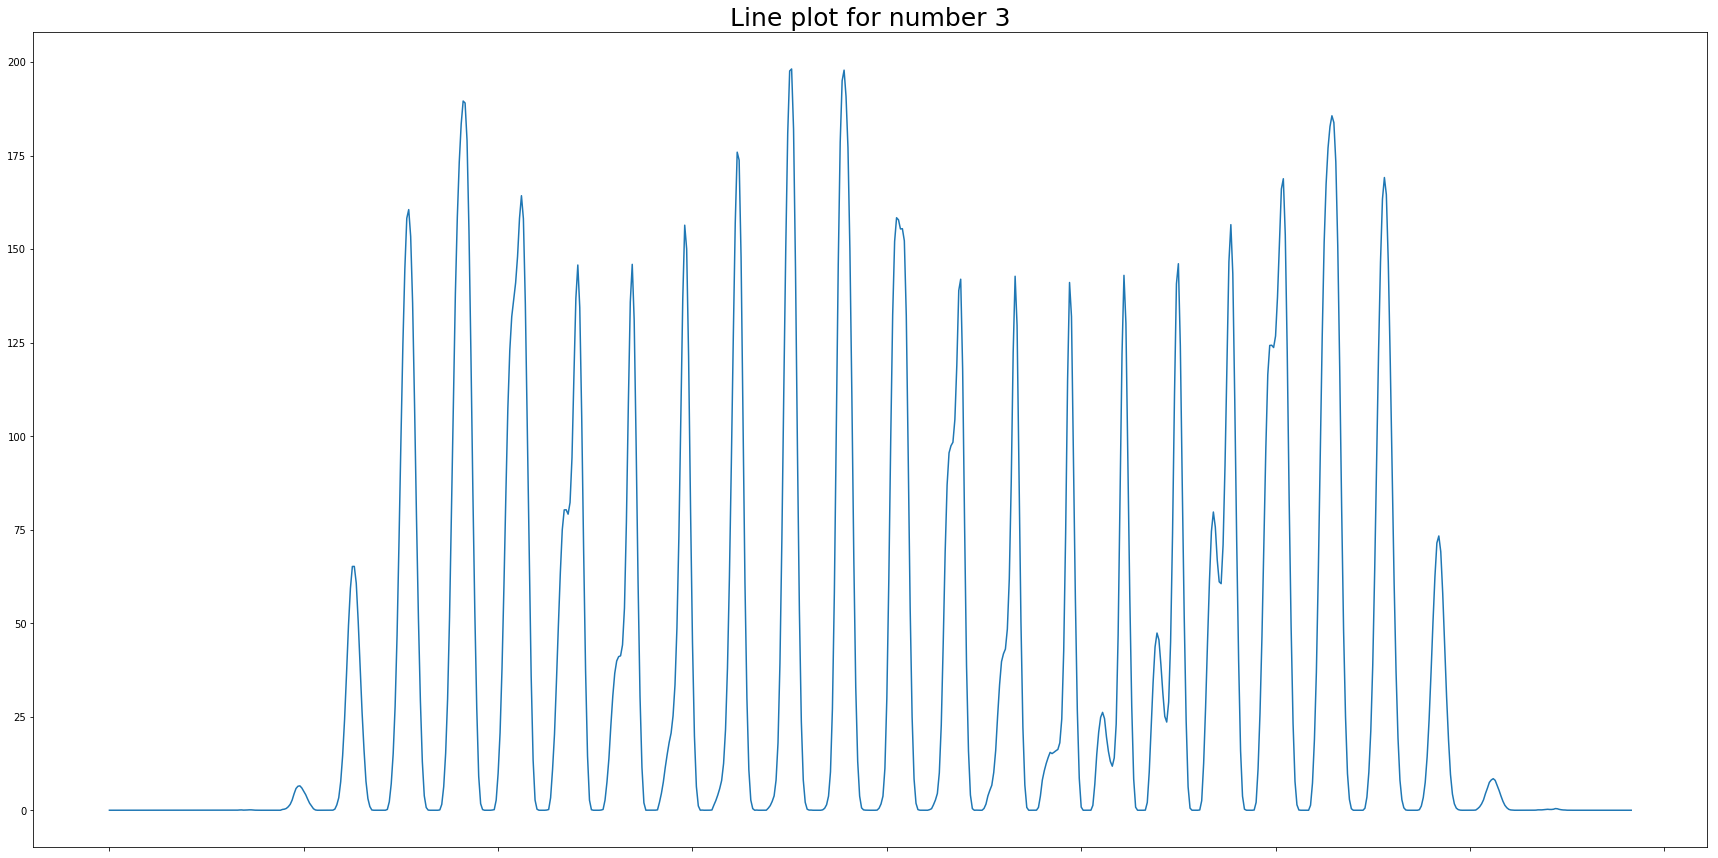

In [27]:
# Line plot for number 3
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[3,:].plot(kind='line')
ax.set_title('Line plot for number 3',fontsize=25)

Text(0.5, 1.0, 'Line plot for number 4')

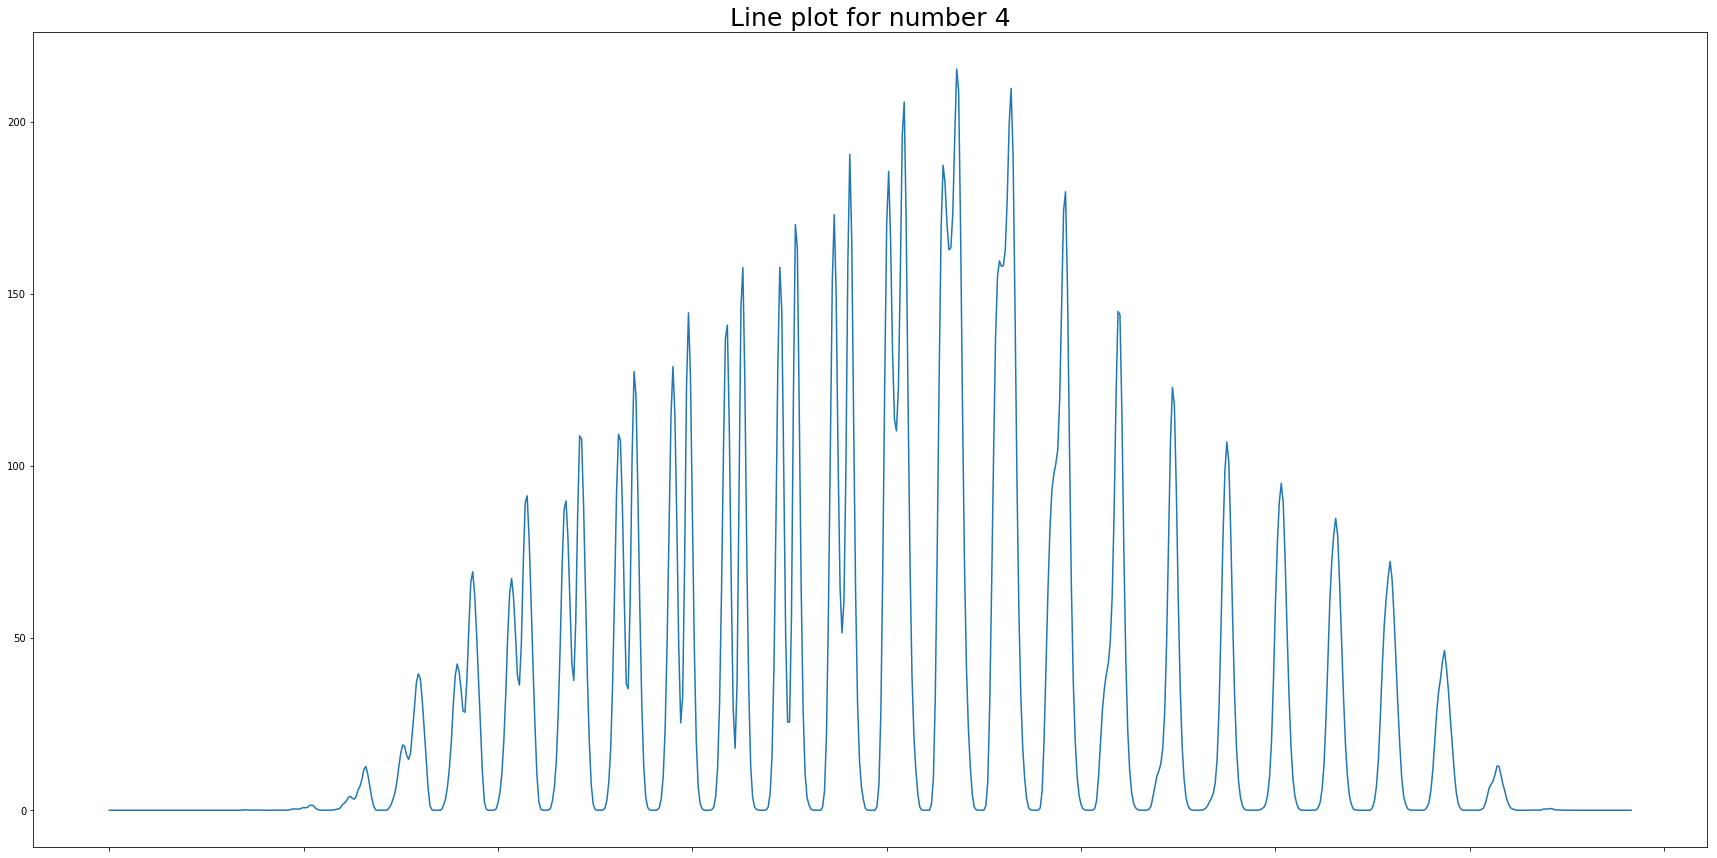

In [28]:
# Line plot for number 4
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[4,:].plot(kind='line')
ax.set_title('Line plot for number 4',fontsize=25)

Text(0.5, 1.0, 'Line plot for number 5')

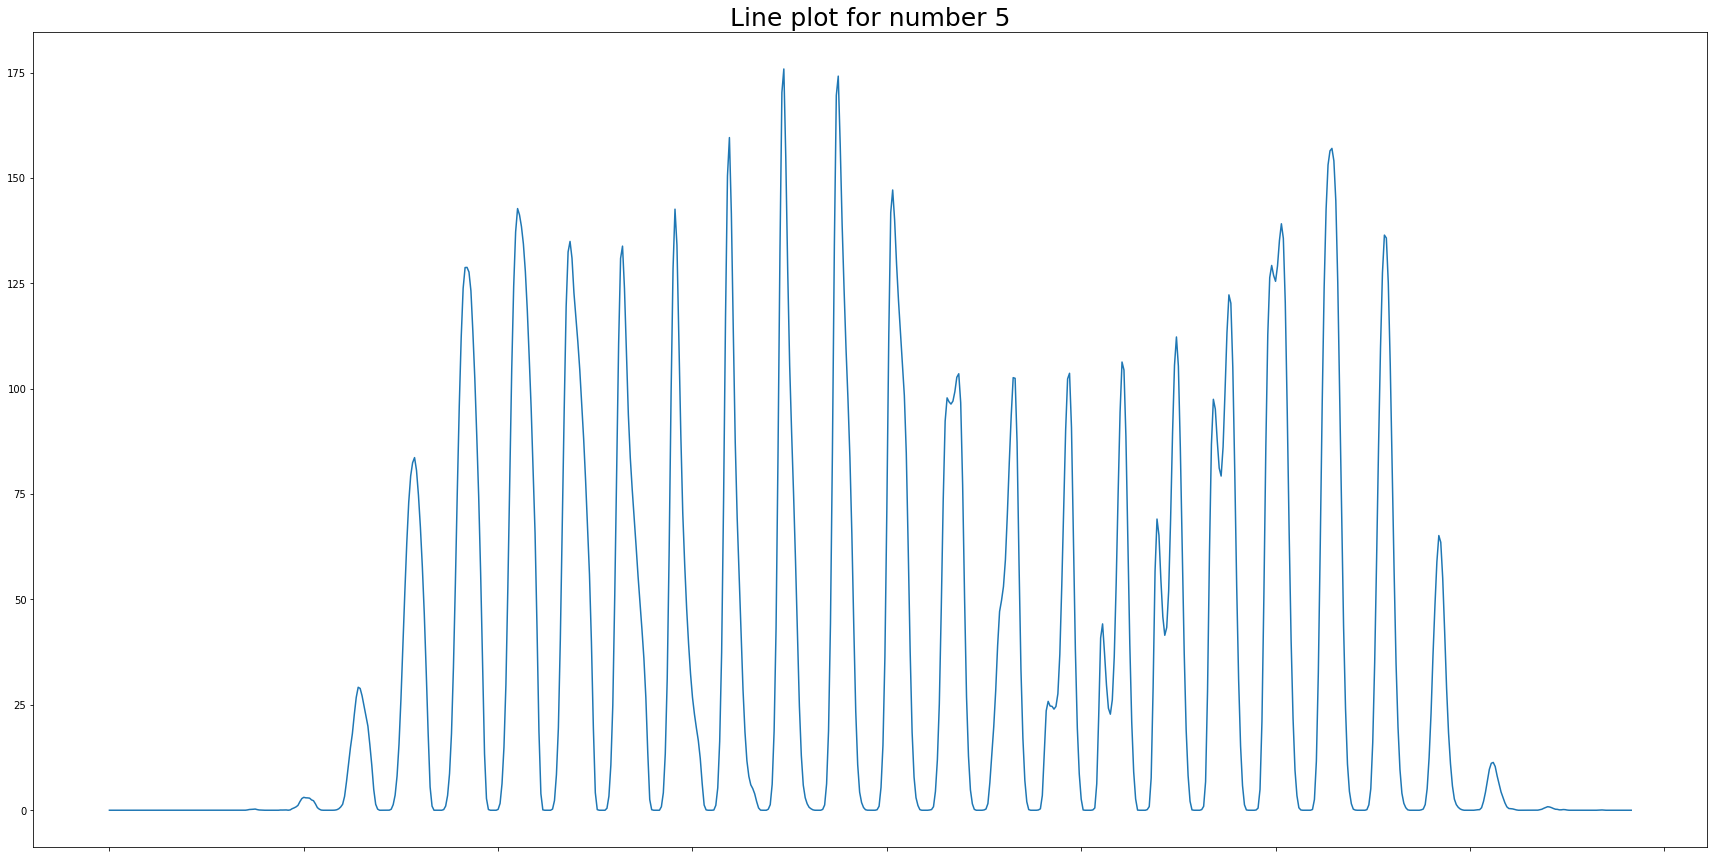

In [29]:
# Line plot for number 5
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[5,:].plot(kind='line')
ax.set_title('Line plot for number 5',fontsize=25)

Text(0.5, 1.0, 'Line plot for number 6')

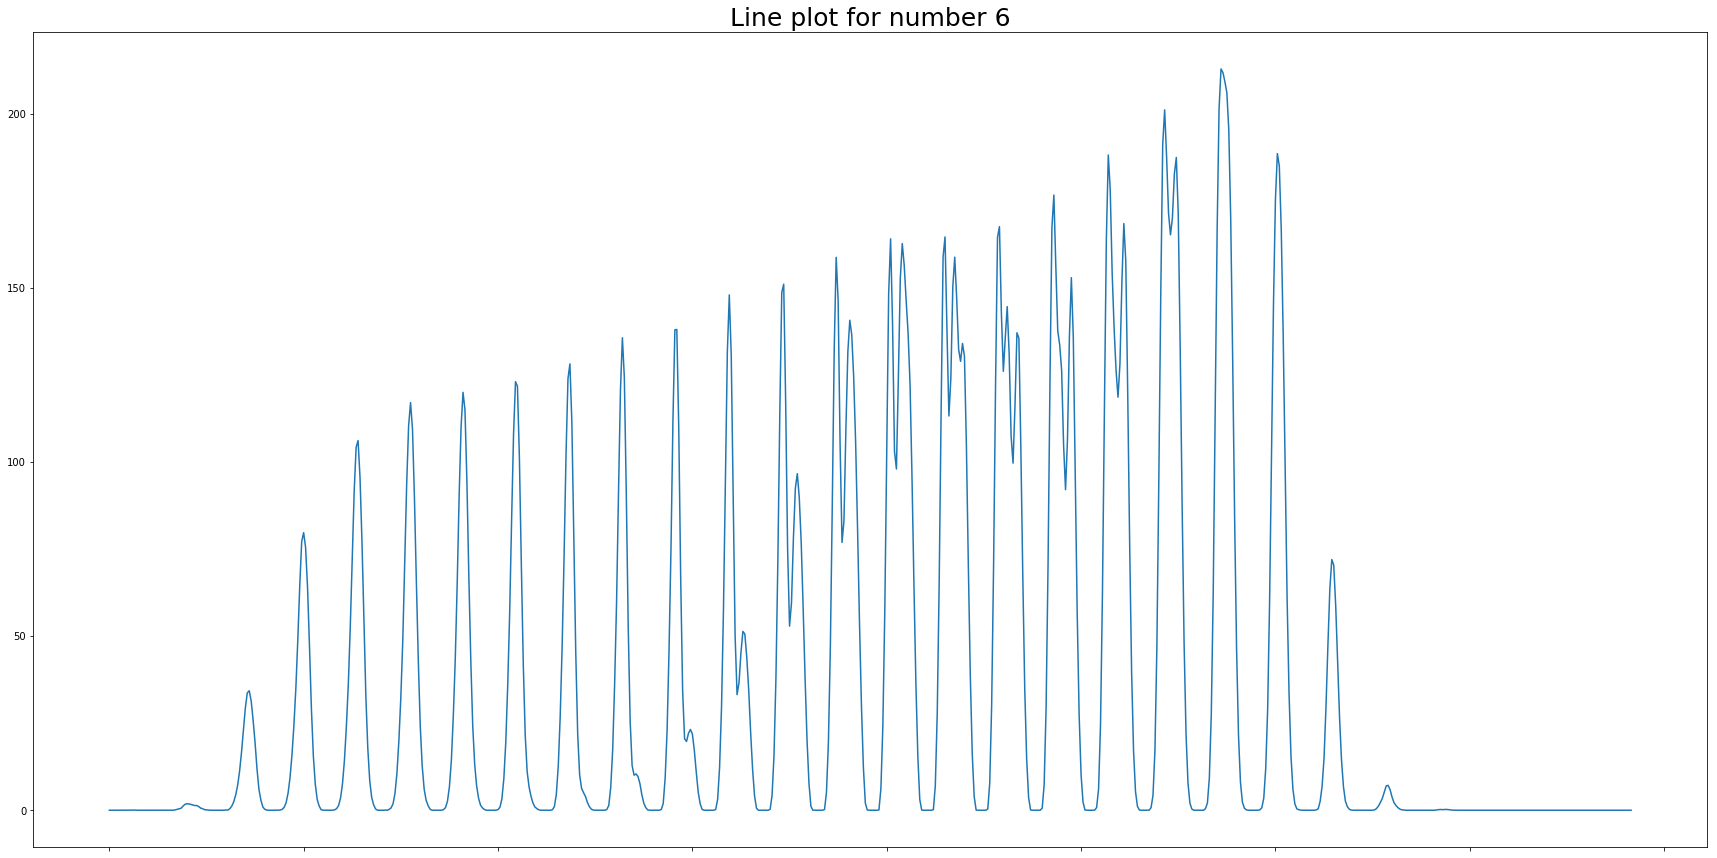

In [30]:
# Line plot for number 6
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[6,:].plot(kind='line')
ax.set_title('Line plot for number 6',fontsize=25)

Text(0.5, 1.0, 'Line plot for number 7')

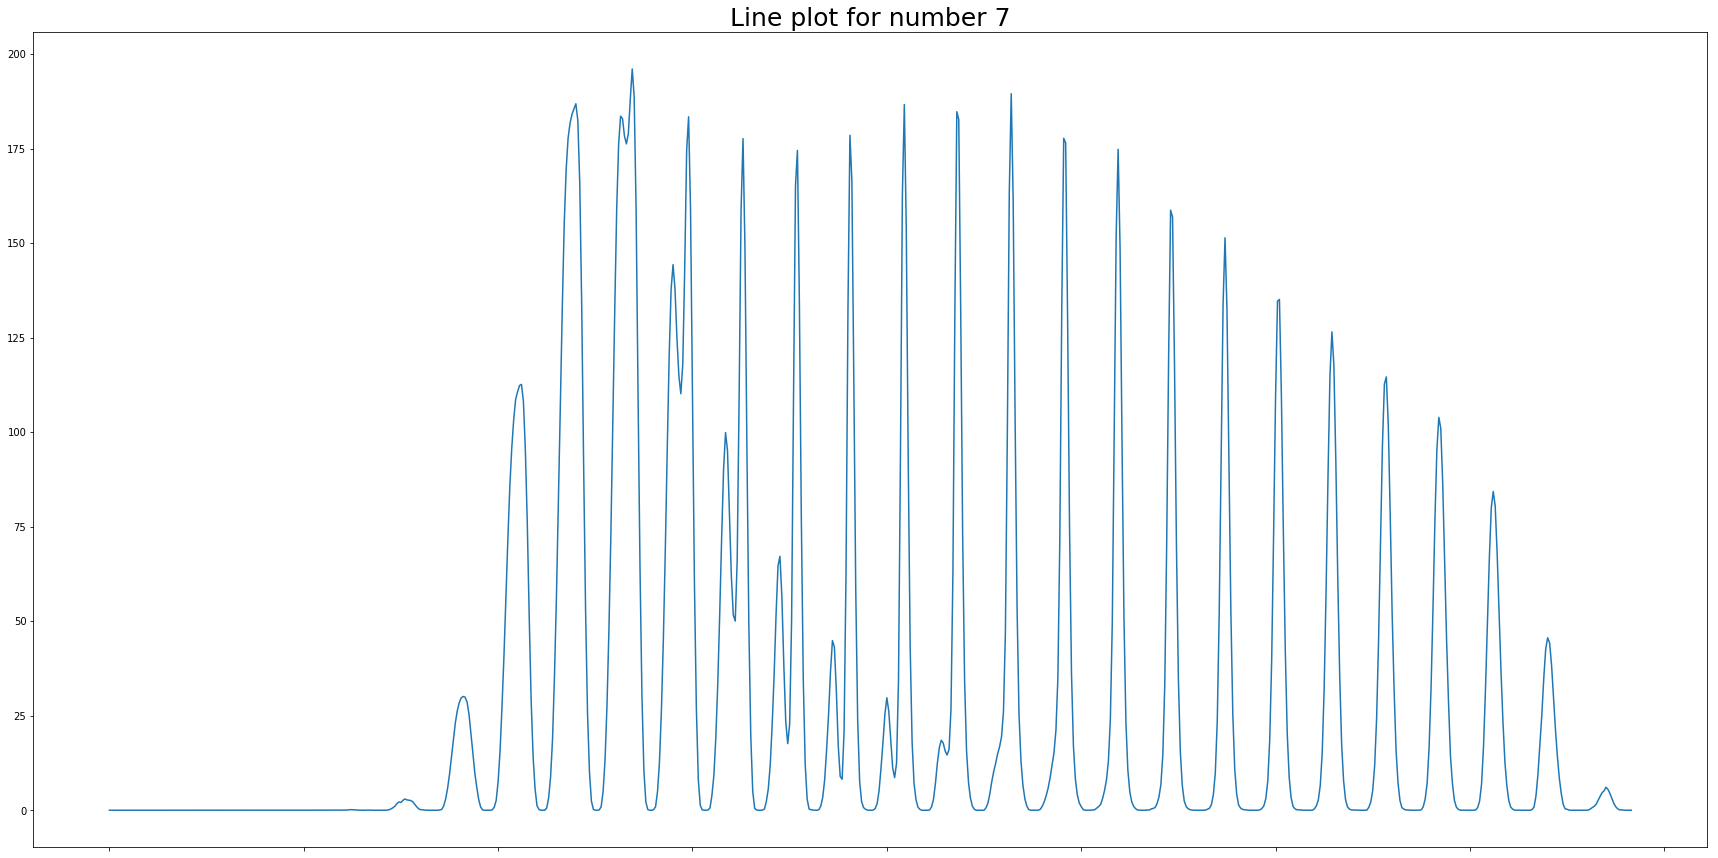

In [31]:
# Line plot for number 7
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[7,:].plot(kind='line')
ax.set_title('Line plot for number 7',fontsize=25)

Text(0.5, 1.0, 'Line plot for number 8')

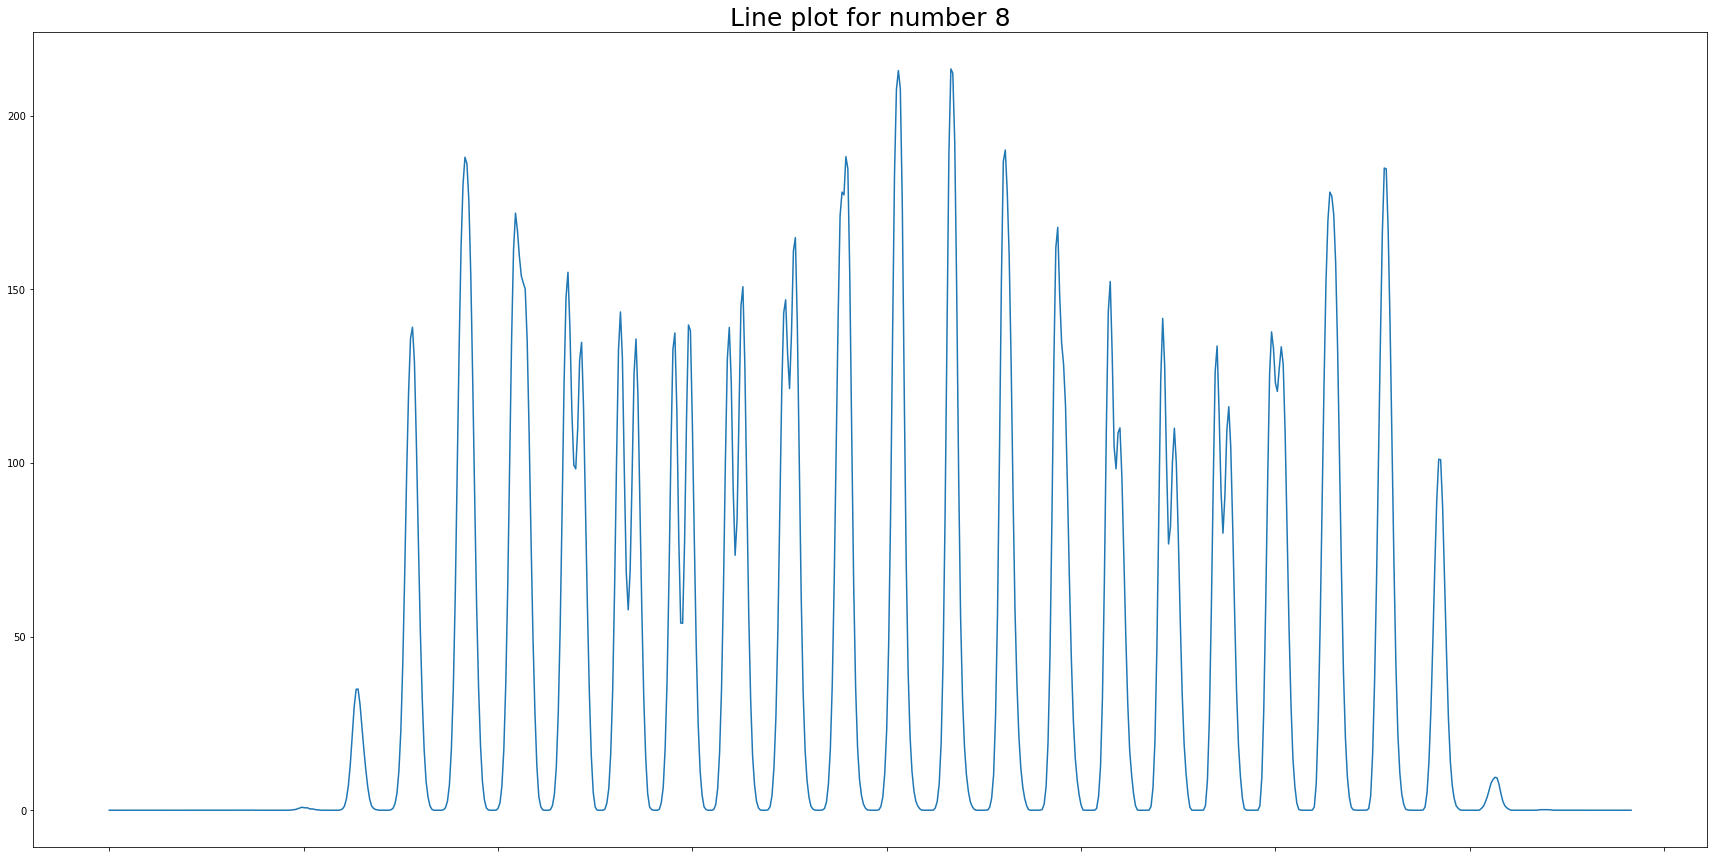

In [32]:
# Line plot for number 8
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[8,:].plot(kind='line')
ax.set_title('Line plot for number 8',fontsize=25)

Text(0.5, 1.0, 'Line plot for number 9')

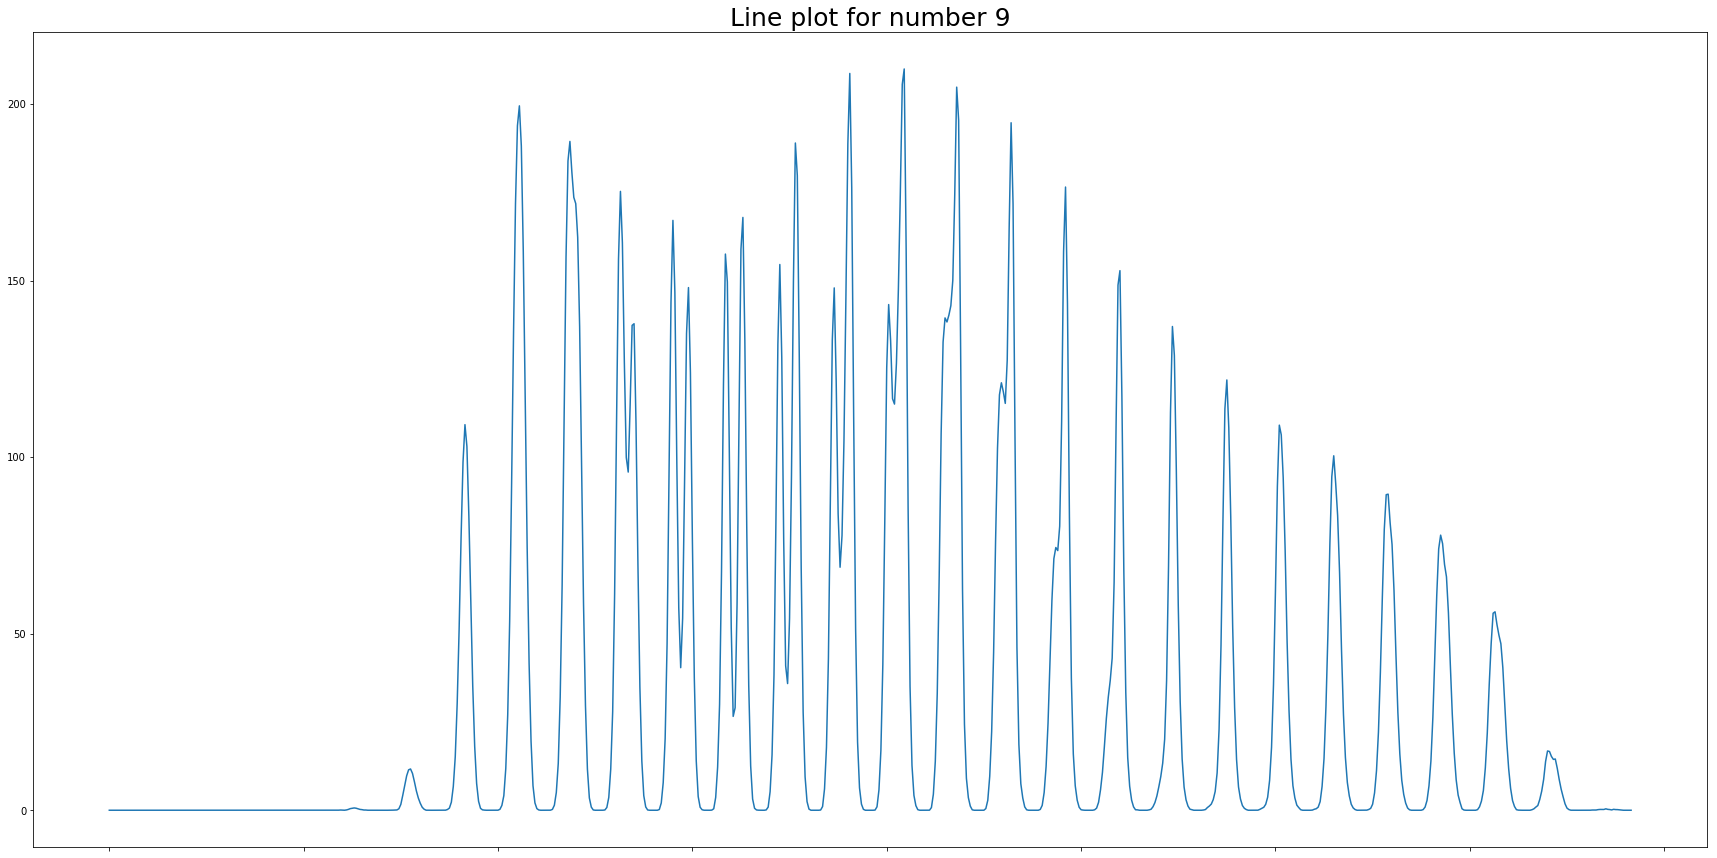

In [33]:
# Line plot for number 9
fig = plt.figure(figsize = (30,15))
ax = numbers_mean.loc[9,:].plot(kind='line')
ax.set_title('Line plot for number 9',fontsize=25)

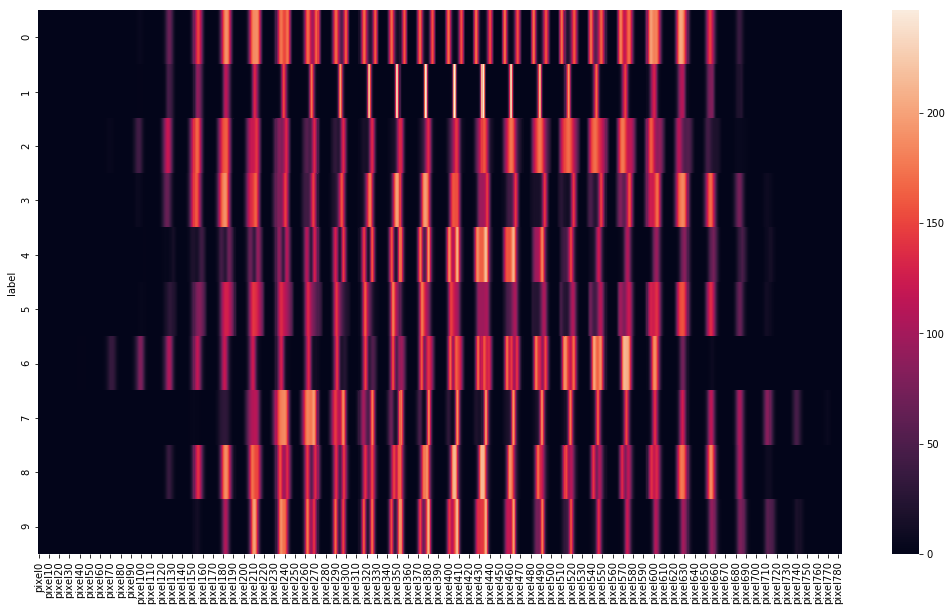

In [34]:
# plot heatmap for above mean values
plt.figure(figsize=(18, 10))
sns.heatmap(numbers_mean)

## Data preparation for model building

In [35]:
# Let's look at the data head first
numbers_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# 20% sample from train.csv 
numbers_subsample_df = numbers_df.sample(frac =.20,random_state = 101) 

In [37]:
# shape of 20% data set
numbers_subsample_df.shape

(8400, 785)

In [38]:
# average feature values
round(numbers_subsample_df.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.00
pixel14     0.00
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.02
pixel762    0.05
pixel763    0.10
pixel764    0.13
pixel765    0.14
pixel766    0.29
pixel767    0.49
pixel768    0.51
pixel769    0.38
pixel770    0.59
pixel771    0.69
pixel772    0.54
pixel773    0.32
pixel774    0.24
pixel775    0.16
pixel776    0.07
pixel777    0.04
pixel778    0.04
pixel779    0.01
pixel780    0.00
pixel781    0.

In [39]:
# splitting into X and y
X = numbers_subsample_df.drop("label", axis = 1)
y = numbers_subsample_df['label']

In [40]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

## Model Building

Let's fist build three basic models - linear and non-linear(2) with default hyperparameters, and compare the accuracies.

#### Linear model

In [41]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)



In [42]:
# Linear model - confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9063492063492063 

[[215   0   1   1   0   3   1   0   0   0]
 [  0 273   0   1   2   1   0   1   3   0]
 [  3   1 231   6   5   1   4   3   2   0]
 [  0   1   4 239   1   9   0   1   4   3]
 [  0   1   3   0 229   0   1   0   0  12]
 [  2   1   3  11   2 181   5   0  11   0]
 [  4   0   3   0   3   2 243   0   0   0]
 [  1   4   4   2   5   1   0 239   0  13]
 [  2   8   7  15   0   5   2   3 197   3]
 [  3   0   0   5   9   3   0  14   1 237]]


#### Non-Linear model - poly

In [43]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='poly')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [44]:
# Non-Linear model (poly) - confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8337301587301588 

[[191   0   0   0   4   1   2   0  22   1]
 [  0 275   0   0   2   1   0   0   2   1]
 [  1   0 191   2  10   0   1   0  49   2]
 [  0   5   2 200   1   1   0   2  45   6]
 [  0   1   0   0 225   1   0   2   0  17]
 [  0   1   0   4   5 138   1   0  63   4]
 [  1   1   0   0  11   1 217   0  24   0]
 [  0   4   2   1  12   0   0 192   5  53]
 [  0   2   1   7   0   6   0   0 221   5]
 [  0   0   1   1   5   0   0   5   9 251]]


#### Non-Linear model - rbf

In [45]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [46]:
# Non-Linear model (rbf) - confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9305555555555556 

[[214   0   1   0   0   1   3   0   2   0]
 [  0 270   2   1   3   3   0   1   1   0]
 [  2   0 240   3   4   1   2   3   1   0]
 [  0   1   7 244   0   3   0   3   1   3]
 [  0   0   0   0 236   1   1   3   0   5]
 [  2   0   3   8   0 198   3   0   2   0]
 [  3   0   3   0   1   1 247   0   0   0]
 [  0   2   9   1   6   0   0 244   0   7]
 [  1   3   3   6   1   7   1   3 214   3]
 [  1   0   5   4   3   1   0  18   2 238]]


## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [47]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  9.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [48]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,51.848763,0.268337,8.024726,0.071596,1,0.01,"{'C': 1, 'gamma': 0.01}",0.705782,0.731293,0.715986,...,0.719728,0.008564,9,1.000000,1.000000,0.999787,0.999787,0.999787,0.999872,0.000104
1,14.202257,0.506801,4.204682,0.137862,1,0.001,"{'C': 1, 'gamma': 0.001}",0.926020,0.937075,0.914966,...,0.929422,0.008297,3,0.974065,0.976828,0.975128,0.975340,0.975553,0.975383,0.000886
2,24.113717,1.090159,6.552625,0.312515,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.891156,0.903061,0.884354,...,0.896429,0.007460,6,0.910927,0.910289,0.913053,0.907100,0.911565,0.910587,0.001970
3,62.488657,2.606682,8.875732,0.594716,10,0.01,"{'C': 10, 'gamma': 0.01}",0.724490,0.744898,0.733844,...,0.737755,0.007655,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,15.757528,1.033306,5.562199,0.624335,10,0.001,"{'C': 10, 'gamma': 0.001}",0.930272,0.943027,0.925170,...,0.936735,0.007579,1,0.999362,0.999787,0.999575,0.998937,0.999362,0.999405,0.000282
5,14.593823,0.627912,7.832251,1.483538,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.920918,0.933673,0.911565,...,0.925680,0.008462,5,0.966837,0.967049,0.965986,0.965561,0.965561,0.966199,0.000631
6,196.863189,5.905563,23.663968,0.937656,100,0.01,"{'C': 100, 'gamma': 0.01}",0.724490,0.744898,0.733844,...,0.737755,0.007655,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,48.091527,3.147564,13.270715,0.389219,100,0.001,"{'C': 100, 'gamma': 0.001}",0.928571,0.941327,0.923469,...,0.935714,0.008096,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,25.559086,0.831978,9.998225,0.321959,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.926871,0.932823,0.922619,...,0.928912,0.006534,4,0.995748,0.996173,0.995536,0.995748,0.996811,0.996003,0.000454


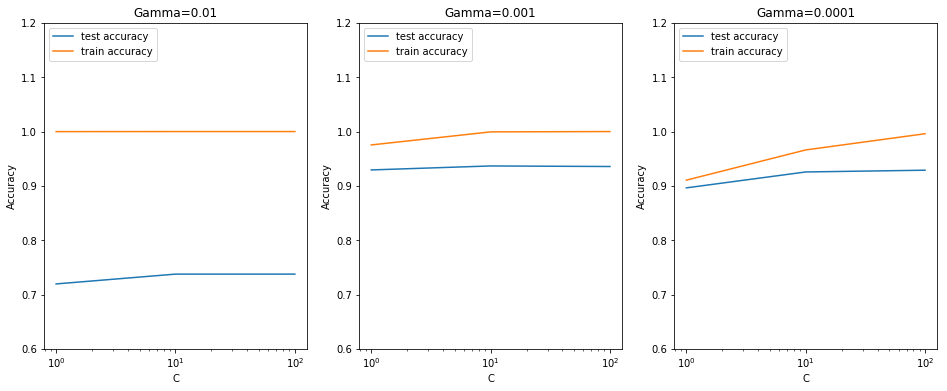

In [49]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [50]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.936734693877551 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


## Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [51]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.9365079365079365 

[[216   0   1   0   0   1   2   0   1   0]
 [  0 272   2   1   3   1   0   1   1   0]
 [  2   0 240   4   4   1   2   2   1   0]
 [  0   1   5 244   1   4   0   2   2   3]
 [  0   0   2   0 233   1   2   3   0   5]
 [  0   0   2   7   0 202   2   0   3   0]
 [  3   0   5   0   1   1 245   0   0   0]
 [  0   1   8   1   4   0   0 246   1   8]
 [  2   2   1   7   1   6   0   3 217   3]
 [  1   0   5   5   0   2   0  13   1 245]] 



#### Evaluation : Prediction on test.csv using final model

In [52]:
# reading the dataset from test.csv file
numbers_test_df = pd.read_csv("test.csv")

In [53]:
# In test.csv we don't have label column.
# So no need to split into X and y. This whole data set will be considered as x.
X = numbers_test_df

In [54]:
# scaling the features
X_scaled = scale(X)

In [55]:
# number prediction for test.csv using final model
y_pred = model.predict(X_scaled)

In [56]:
# add predicted label in to numbers_test_df dataframe
numbers_test_df['predicted_label'] = y_pred

In [57]:
# check head with predicted_label
numbers_test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,predicted_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


# Conclusion

We have tried building linear and non-linear svm model. And we have seen that non-linear model perform better than linear model. Later we tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. And finally we have the best test score of approx 93% corresponding to hyperparameters {'C': 10, 'gamma': 0.001}.
